In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
on = pd.read_excel('./데이터프레임/아이디어스_온라인.xlsx')
on.head()

,category,title,url,nickname,datetime,review,star
0,우드/라탄,따뜻한 감성으로 가득 채우는 라탄 소품,https://www.idus.com/oc/class/131,EY,2021년 5월 18일,처음 접해보는데 설명도 잘해주시고 너무 재밌게 만들고있어요,5.0
1,우드/라탄,따뜻한 감성으로 가득 채우는 라탄 소품,https://www.idus.com/oc/class/131,민진,2021년 5월 18일,수강신청은 벌써 했는데 이제서야 두번째 작품을 완성했습니다.. 처음 접하는 라탄공...,5.0
2,우드/라탄,따뜻한 감성으로 가득 채우는 라탄 소품,https://www.idus.com/oc/class/131,KIM DongHee,2021년 5월 15일,다른 작가님들 클래스 동영상도 봤는데 올라 라탄 작가님이 가장 알기 쉽게 설명 해 ...,5.0
3,우드/라탄,따뜻한 감성으로 가득 채우는 라탄 소품,https://www.idus.com/oc/class/131,u na,2021년 5월 11일,강사님 목소리와 라탄으로 너무 힐링됩니다. 라탄 취미가 생겨서 너무 즐겁네요,5.0
4,우드/라탄,따뜻한 감성으로 가득 채우는 라탄 소품,https://www.idus.com/oc/class/131,엉이,2021년 5월 5일,재밌었어요 ㅎㅎ,5.0


In [3]:
on.isnull().sum()

category      0
title         0
url         575
nickname      4
datetime      0
review        0
star          0
dtype: int64

In [12]:
on.sort_values(by='datetime', ascending=True).head() 
# 가장 최근 댓글, 디자인을 입힌 나만의 캔들 만들기 20-5=7 
# 가장 오래된 댓글, 한 땀씩 배우는 반짝반짝 플라워 자수 20-10-11 

,category,title,url,nickname,datetime,review,star
300,플라워/가드닝,한 땀씩 배우는 반짝반짝 플라워 자수,https://www.idus.com/oc/class/45,김은진,2020년 10월 11일,처음배우는데 재밌어요 가끔 헷갈리는부분들이 있지만 반복재생하며 잘 배웠습니다 전체...,5.0
207,바느질/재봉,사랑스런 아이들의 그림으로 만드는 입체인형 재봉 클래스,https://www.idus.com/oc/class/22,이승하,2020년 10월 13일,선생님의 친절한 설명과 과정에 감사드립니다.,5.0
215,바느질/재봉,바늘 끝에서 탄생하는 상상 속 작은 양모 인형,https://www.idus.com/oc/class/21,PANDA,2020년 10월 14일,조금 모양 만들기가 힘들었지만 차분한 설명덕분에 끝까지 할수 있었어요,5.0
281,우드/라탄,작은 미니어처들을 모아 집을 짓는 돌하우스 공예,https://www.idus.com/oc/class/12,김민지,2020년 10월 4일,3개월에 걸쳐서 다 만들었어요. 점토작업은 완성작을보고 저걸 어떻게 만드나 싶다가...,5.0
282,우드/라탄,작은 미니어처들을 모아 집을 짓는 돌하우스 공예,https://www.idus.com/oc/class/12,앨,2020년 10월 4일,6개월에 걸쳐 드디어 완성했네요 시간날때마다 틈틈이 만들어서 완성된 모습보니 뿌...,5.0


In [4]:
print('전체 학습데이터의 개수: {}'.format(len(on)))

전체 학습데이터의 개수: 899


In [13]:
review_length = on['review'].astype(str).apply(len)
review_length.head()

0     33
1    110
2    218
3     44
4      8
Name: review, dtype: int64

In [33]:
review_length.value_counts()

51     7
3      7
4      7
27     6
57     5
      ..
128    1
131    1
132    1
260    1
1      1
Name: review, Length: 188, dtype: int64

In [6]:
null = on[on.url != on.url].index
on.drop(null, inplace=True)

Text(0, 0.5, 'Number of review')

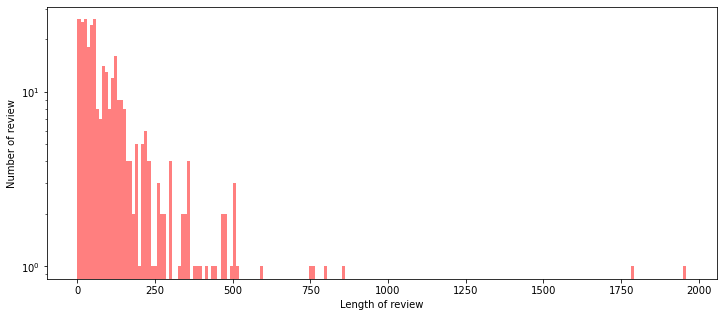

In [16]:
# 그래프에 대한 이미지 사이즈 선언
plt.figure(figsize=(12, 5))
plt.hist(review_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip') 

# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review') # comment가 없는게 제일 많음

In [17]:
print('리뷰 길이 최대 값: {}'.format(np.max(review_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(review_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(review_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(review_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(review_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(review_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(review_length, 75)))

리뷰 길이 최대 값: 1959
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 132.19
리뷰 길이 표준편차: 194.04
리뷰 길이 중간 값: 82.0
리뷰 길이 제 1 사분위: 32.0
리뷰 길이 제 3 사분위: 150.0


{'whiskers': [<matplotlib.lines.Line2D at 0x20aff82dd90>,
 'caps': [<matplotlib.lines.Line2D at 0x20afffc0490>,
 'boxes': [<matplotlib.lines.Line2D at 0x20aff82da90>],
 'medians': [<matplotlib.lines.Line2D at 0x20afffc0b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x20afffc80a0>],
 'means': [<matplotlib.lines.Line2D at 0x20afffc0e50>]}

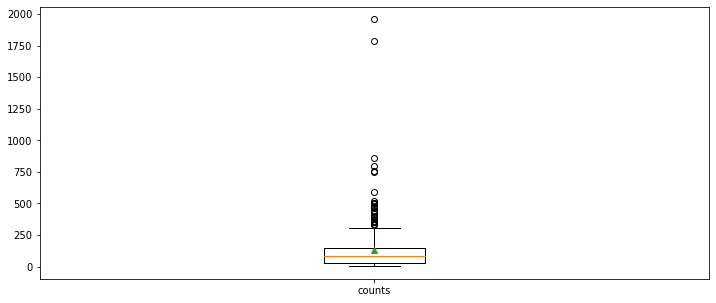

In [18]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(review_length,
             labels=['counts'],
             showmeans=True) # 길이가 긴 데이터가 꽤 있음

In [19]:
train_review = [review for review in on['review'] if type(review) is str] # str 아닌 것 제거

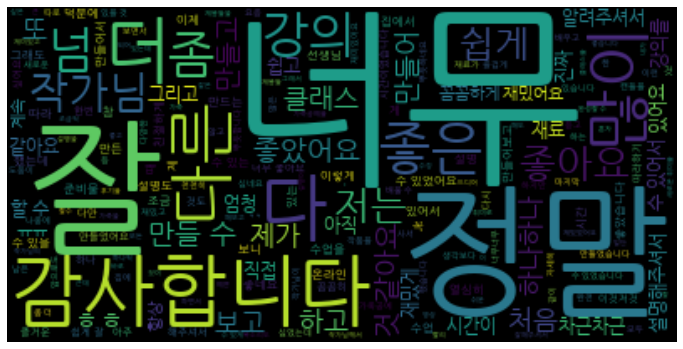

In [21]:
wordcloud = WordCloud(font_path ='NanumGothic.ttf').generate(' '.join(train_review))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation = 'bilinear') # 글자의 배열 형태를 bilinear로 지정, 2개의 선??
plt.axis('off') # x, y 축 나오지 않게하기
plt.show()

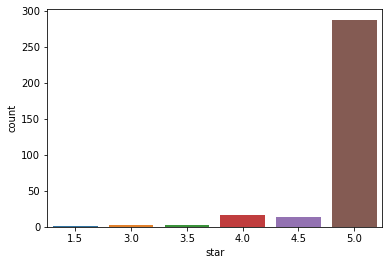

In [23]:
sns.countplot(on['star'])

In [25]:
on.star.value_counts()

5.0    288
4.0     17
4.5     13
3.5      3
3.0      2
1.5      1
Name: star, dtype: int64

In [29]:
on[on.star==1.5].review.values

array(['1 3 거의 나오자마자 결제했는데 그때 235000원에 결제했는데ㅠㅠ 지금은 상시가격 자체가 200000원이네요.... 왜 빨리 한 사람이 더 손해를 봐야하는지ㅠㅠㅠㅠ 강의 자체는 맘에 들어요ㅠㅠ'],
      dtype=object)

In [30]:
on[on.star==3].review.values

array(['캔들 처음 입문했는데 재미있게 수업들었습니다  아무래도 집에서 하고나면..베란다 문을 열어놔도...넘 독한 냄새때문에 골머리를 앓아지만요..ㅠㅠ 향료을 정할 수 없는점은 다소 아쉬운것 같아요ㅜ  선물용으로 잔뜩 만들어두고 주변에 나눔할 수 있었습니다. ',
       '쉽게 만들 수 있습니다  '], dtype=object)

In [31]:
on[on.star==3.5].review.values

array(['조아요', '  ',
       '집에서 혼자 할수 있는수준이예여  하지만 꾸준하지 못하신 분들은 추천 안해요...ㅠ 제가 그랬거든요.하다가 말다가 ..이런부분들이 장점으로도 올수 있지만 돈아땁다는 생각이 드는 단점이 될수도 있어요  잘생각해보 들으세용  특히 유리특성상 방에서 앉아서 하기 생각보다 힘들어요...'],
      dtype=object)

In [26]:
word_counts = on['review'].astype(str).apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

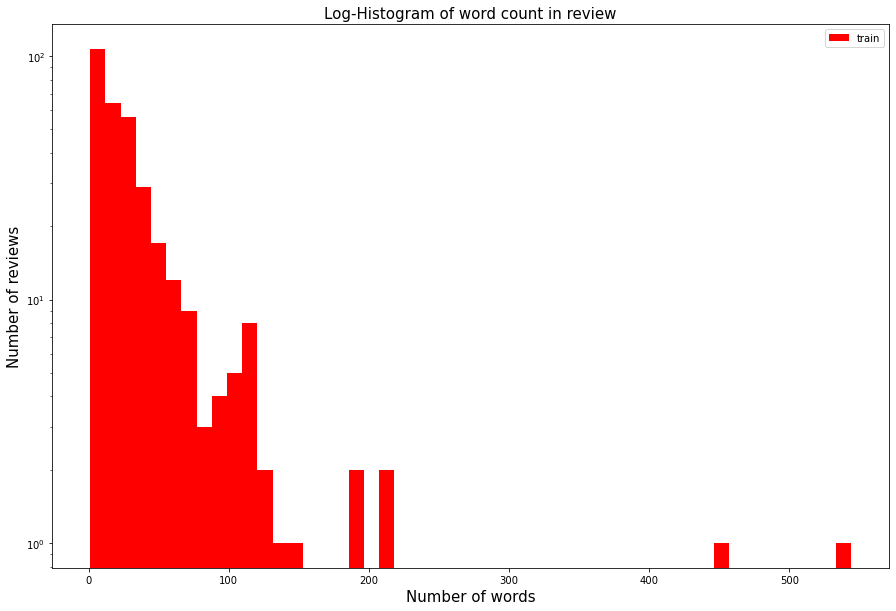

In [27]:
plt.figure(figsize=(15, 10))
plt.hist(word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [32]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(word_counts, 75)))# 최대 단어 개수를 6, 7개

리뷰 단어 개수 최대 값: 544
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 33.61
리뷰 단어 개수 표준편차: 50.40
리뷰 단어 개수 중간 값: 20.5
리뷰 단어 개수 제 1 사분위: 9.0
리뷰 단어 개수 제 3 사분위: 37.0
